In [ ]:
import pandas as pd
from glob import glob
import re
import numpy as np
def extract_date(filename):
    match = re.search(r'_(\d{8})', filename)
    return int(match.group(1)) if match else 0

depth_files = sorted(glob('/content/depth20/*.txt'), key=extract_date)
aggtrade_files = sorted(glob('/content/aggtrade/*.txt'), key=extract_date)
depth20_df = pd.concat([pd.read_csv(f) for f in depth_files], ignore_index=True)
aggtrade_df = pd.concat([pd.read_csv(f) for f in aggtrade_files], ignore_index=True)


In [ ]:
depth20_df.head()

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-14 00:00:02.292522546 +0530 IST,579.20,0.621,579.24,0.015,579.25,0.009,579.26,0.013,579.27,...,579.67,1.151,579.68,0.043,579.69,1.258,579.70,0.911,579.71,2.025
1,2025-03-14 00:00:03.292828523 +0530 IST,579.08,2.612,579.09,8.606,579.10,3.453,579.11,3.825,579.12,...,579.59,0.971,579.60,5.071,579.61,4.894,579.62,1.017,579.63,0.048
2,2025-03-14 00:00:04.292889586 +0530 IST,579.14,1.948,579.15,3.957,579.18,1.681,579.19,3.465,579.20,...,579.62,1.017,579.63,0.048,579.64,9.720,579.65,2.025,579.66,0.365
3,2025-03-14 00:00:05.292551566 +0530 IST,579.07,0.013,579.08,0.013,579.09,8.606,579.10,3.453,579.11,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,7.213
4,2025-03-14 00:00:06.292725093 +0530 IST,579.11,9.143,579.12,6.361,579.13,5.837,579.14,2.816,579.15,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,10.469


In [ ]:
depth20_df['Time'] = depth20_df['Time'].str.replace(r'\+.*', '', regex=True)
aggtrade_df['Time'] = aggtrade_df['Time'].str.replace(r'\+.*', '', regex=True)

In [ ]:
depth20_df['Time'] = pd.to_datetime(depth20_df['Time'], errors='coerce')
aggtrade_df['Time'] = pd.to_datetime(aggtrade_df['Time'], errors='coerce')

In [ ]:
depth20_df['Time']

,Time
0,2025-03-14 00:00:02.292522546
1,2025-03-14 00:00:03.292828523
2,2025-03-14 00:00:04.292889586
3,2025-03-14 00:00:05.292551566
4,2025-03-14 00:00:06.292725093
...,...
338514,2025-03-18 00:00:04.292194568
338515,2025-03-18 00:00:05.292363895
338516,2025-03-18 00:00:06.292254740
338517,2025-03-18 00:00:07.292648033


In [ ]:
depth20_df.set_index('Time', inplace=True)
aggtrade_df.set_index('Time', inplace=True)

In [ ]:
depth20_1s = depth20_df.resample('1S').ffill()
aggtrade_1s = aggtrade_df.resample('1S').ffill()

/tmp/ipython-input-1357017129.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  depth20_1s = depth20_df.resample('1S').ffill()
/tmp/ipython-input-1357017129.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  aggtrade_1s = aggtrade_df.resample('1S').ffill()


In [ ]:
depth20_1s = depth20_1s.reset_index()
aggtrade_1s = aggtrade_1s.reset_index()

In [ ]:
depth20_1s.head()

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-14 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-14 00:00:03,579.20,0.621,579.24,0.015,579.25,0.009,579.26,0.013,579.27,...,579.67,1.151,579.68,0.043,579.69,1.258,579.70,0.911,579.71,2.025
2,2025-03-14 00:00:04,579.08,2.612,579.09,8.606,579.10,3.453,579.11,3.825,579.12,...,579.59,0.971,579.60,5.071,579.61,4.894,579.62,1.017,579.63,0.048
3,2025-03-14 00:00:05,579.14,1.948,579.15,3.957,579.18,1.681,579.19,3.465,579.20,...,579.62,1.017,579.63,0.048,579.64,9.720,579.65,2.025,579.66,0.365
4,2025-03-14 00:00:06,579.07,0.013,579.08,0.013,579.09,8.606,579.10,3.453,579.11,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,7.213


In [ ]:
aggtrade_1s.head()

,Time,Price,Quantity,IsMarketMaker,NumTrades,M
0,2025-03-14 00:00:02,NaN,NaN,NaN,NaN,NaN
1,2025-03-14 00:00:03,579.38,0.104,True,1.0,True
2,2025-03-14 00:00:04,579.30,5.221,True,2.0,True
3,2025-03-14 00:00:05,579.37,0.789,True,1.0,True
4,2025-03-14 00:00:06,579.30,1.726,True,1.0,True


In [ ]:
merged_df = pd.merge_asof(
    aggtrade_1s.sort_values('Time'),
    depth20_1s.sort_values('Time'),
    on='Time',
    direction='nearest',

)

In [ ]:
merged_df.head(5)

,Time,Price,Quantity,IsMarketMaker,NumTrades,M,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-14 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-14 00:00:03,579.38,0.104,True,1.0,True,579.20,0.621,579.24,0.015,...,579.67,1.151,579.68,0.043,579.69,1.258,579.70,0.911,579.71,2.025
2,2025-03-14 00:00:04,579.30,5.221,True,2.0,True,579.08,2.612,579.09,8.606,...,579.59,0.971,579.60,5.071,579.61,4.894,579.62,1.017,579.63,0.048
3,2025-03-14 00:00:05,579.37,0.789,True,1.0,True,579.14,1.948,579.15,3.957,...,579.62,1.017,579.63,0.048,579.64,9.720,579.65,2.025,579.66,0.365
4,2025-03-14 00:00:06,579.30,1.726,True,1.0,True,579.07,0.013,579.08,0.013,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,7.213


In [ ]:
features = merged_df.copy()

In [ ]:
features.head(5)

,Time,Price,Quantity,IsMarketMaker,NumTrades,M,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-14 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-14 00:00:03,579.38,0.104,True,1.0,True,579.20,0.621,579.24,0.015,...,579.67,1.151,579.68,0.043,579.69,1.258,579.70,0.911,579.71,2.025
2,2025-03-14 00:00:04,579.30,5.221,True,2.0,True,579.08,2.612,579.09,8.606,...,579.59,0.971,579.60,5.071,579.61,4.894,579.62,1.017,579.63,0.048
3,2025-03-14 00:00:05,579.37,0.789,True,1.0,True,579.14,1.948,579.15,3.957,...,579.62,1.017,579.63,0.048,579.64,9.720,579.65,2.025,579.66,0.365
4,2025-03-14 00:00:06,579.30,1.726,True,1.0,True,579.07,0.013,579.08,0.013,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,7.213


In [ ]:
features['IsMarketMaker']

,IsMarketMaker
0,NaN
1,True
2,True
3,True
4,True
...,...
345592,False
345593,False
345594,False
345595,False


In [ ]:
features['price_var'] = features['Price'].rolling(window=5).var()
features['time_diff'] = features['Time'].diff().dt.total_seconds()
features['avg_time_diff'] = features['time_diff'].rolling(window=5).mean()
features['value_per_second'] = features['Price'] * features['Quantity']

features['log_return'] = np.log(features['Price'] / features['Price'].shift(1))
features['volatility_10s'] = features['log_return'].rolling(window=10).std()
features['volatility_30s'] = features['log_return'].rolling(window=30).std()

features['vwap_10s'] = (features['Price'] * features['Quantity']).rolling(window=10).sum() / features['Quantity'].rolling(window=10).sum()
features['vwap_30s'] = (features['Price'] * features['Quantity']).rolling(window=30).sum() / features['Quantity'].rolling(window=30).sum()

features['vwap_10s_shift'] = features['vwap_10s'].diff()
features['vwap_30s_shift'] = features['vwap_30s'].diff()

def compute_obi(df, levels):
    bid_cols = [f'BidQtyL{i}' for i in range(1, levels + 1)]
    ask_cols = [f'AskQtyL{i}' for i in range(1, levels + 1)]

    bid_sum = df[bid_cols].sum(axis=1)
    ask_sum = df[ask_cols].sum(axis=1)

    obi = (bid_sum - ask_sum) / (bid_sum + ask_sum + 1e-9)
    return obi

features['obi_5'] = compute_obi(features, 5)
features['obi_10'] = compute_obi(features, 10)
features['obi_20'] = compute_obi(features, 20)

features['IsMarketMaker'] = features['IsMarketMaker'].astype(bool)
buy_mask = ~features['IsMarketMaker']
sell_mask = features['IsMarketMaker']
features['avg_buy_price'] = features['Price'].where(buy_mask).rolling(window=1).mean()
features['avg_sell_price'] = features['Price'].where(sell_mask).rolling(window=1).mean()
features['buy_volume'] = features['Quantity'].where(buy_mask).rolling(window=1).sum()
features['sell_volume'] = features['Quantity'].where(sell_mask).rolling(window=1).sum()

features['squared_log_return'] = features['log_return'] ** 2
features['squared_log_return_var_10s'] = features['squared_log_return'].rolling(window=10).var()
features['squared_log_return_var_30s'] = features['squared_log_return'].rolling(window=30).var()

features['avg_buy_price']



,avg_buy_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
345592,627.59
345593,627.59
345594,627.59
345595,627.59


In [ ]:
features.to_csv("features_with_OBI_market.csv", index=False)

In [ ]:
from google.colab import files
files.download("features_with_OBI_market.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

clustering_features = [
    'price_var', 'avg_time_diff', 'value_per_second',
    'volatility_10s', 'volatility_30s',
    'vwap_10s', 'vwap_30s', 'vwap_10s_shift', 'vwap_30s_shift',
    'obi_5', 'obi_10', 'obi_20',
    'squared_log_return_var_10s', 'squared_log_return_var_30s'
]

df_clean = features[clustering_features].dropna()


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [ ]:
inertia = []
K_range = range(1, 21)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

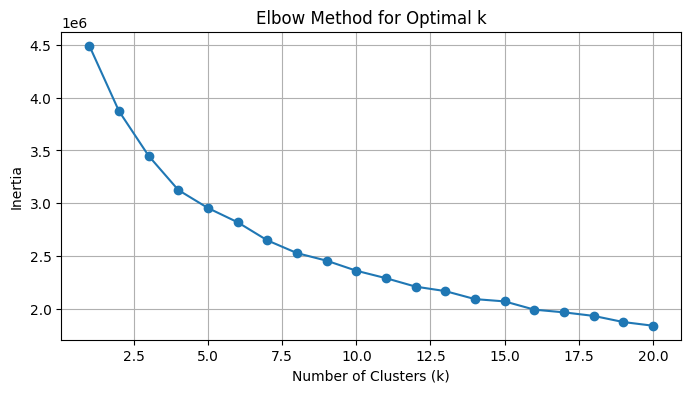

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

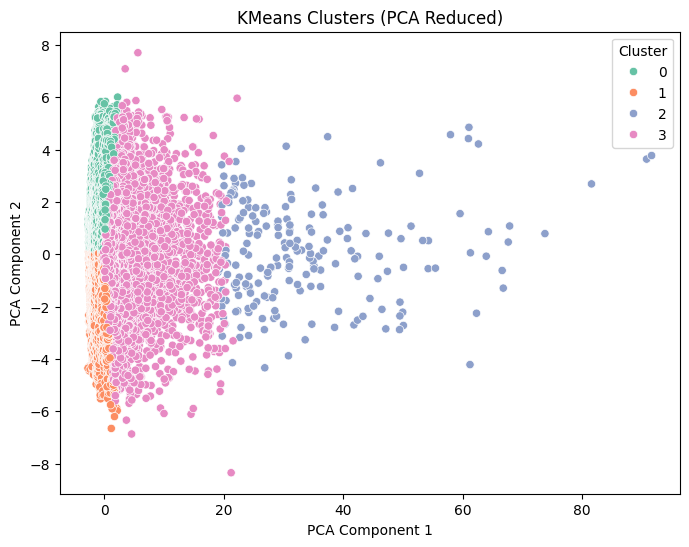

In [ ]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='Set2')
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

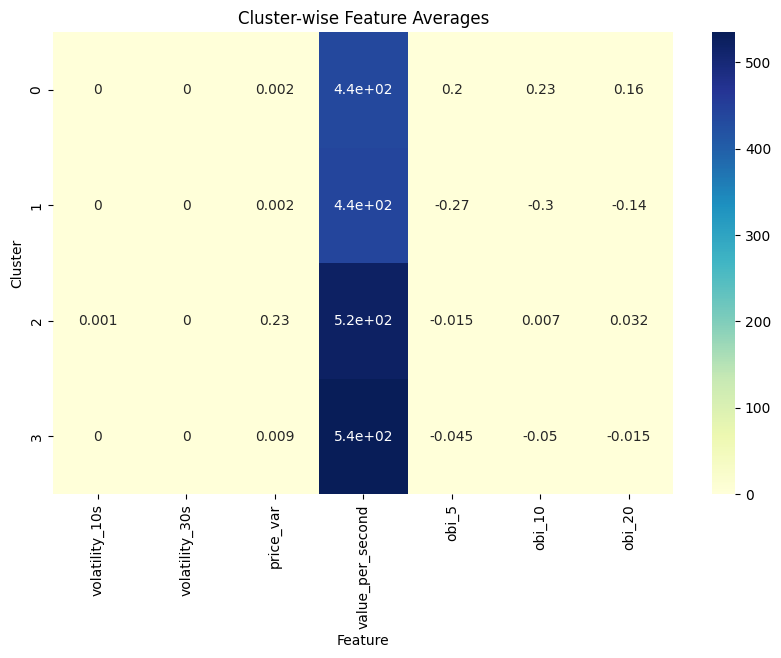

In [ ]:
df_clean['cluster'] = clusters
interpret_features = [
    'volatility_10s', 'volatility_30s',
    'price_var', 'value_per_second',
    'obi_5', 'obi_10', 'obi_20'
]
cluster_averages = df_clean.groupby('cluster')[interpret_features].mean().round(3)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_averages, annot=True, cmap='YlGnBu')
plt.title("Cluster-wise Feature Averages")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.show()

In [ ]:
df_clean['cluster'] = clusters
cluster_summary = df_clean.groupby('cluster')[['volatility_10s', 'volatility_30s',
    'price_var', 'value_per_second',
    'obi_5', 'obi_10', 'obi_20']].mean()
print(cluster_summary)

         volatility_10s  volatility_30s  price_var  value_per_second  \
cluster                                                                
0              0.000067        0.000074   0.002076        435.304202   
1              0.000065        0.000074   0.001913        439.380095   
2              0.000655        0.000449   0.230333        522.041144   
3              0.000138        0.000140   0.008578        535.009489   

            obi_5    obi_10    obi_20  
cluster                                
0        0.199713  0.225489  0.161757  
1       -0.266143 -0.304350 -0.143151  
2       -0.014799  0.006838  0.031653  
3       -0.044892 -0.050457 -0.014870  


cluster_label
Stable Bearish                 136901
Stable Bullish                 126539
Moderate Volatility Bearish     81922
High Volatility Bullish           204
Name: count, dtype: int64


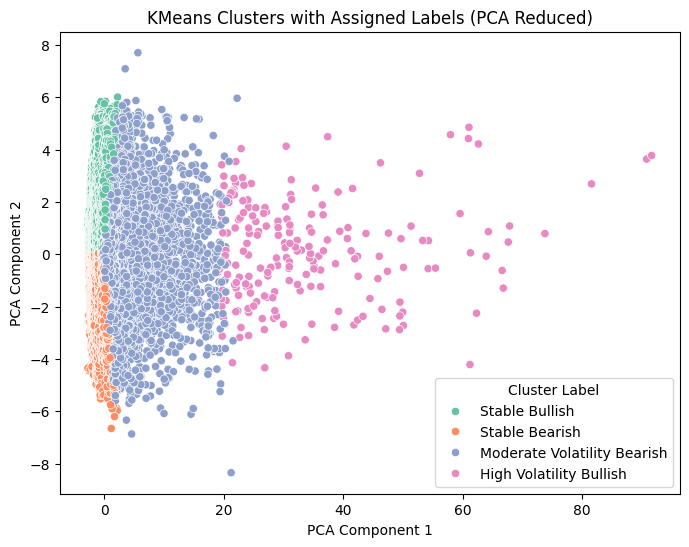

In [ ]:
cluster_labels = {
    0: "Stable Bullish",
    1: "Stable Bearish",
    2: "High Volatility Bullish",
    3: "Moderate Volatility Bearish"
}

df_clean['cluster'] = clusters
df_clean['cluster_label'] = df_clean['cluster'].map(cluster_labels)

print(df_clean['cluster_label'].value_counts())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_clean['cluster_label'], palette='Set2')
plt.title("KMeans Clusters with Assigned Labels (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label")
plt.show()
